In [74]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import maximum_filter, minimum_filter
import importlib

import keypointDetect
importlib.reload(keypointDetect)
from keypointDetect import *

In [75]:
levels = [-1,0,1,2,3,4]
im = cv2.imread('../data/model_chickenbroth.jpg')

In [76]:
# test gaussian pyramid
im_pyr = createGaussianPyramid(im, levels=levels)
gaussian_pyr = displayPyramid(im_pyr)
# compute DoG pyramid
DoG_pyr, DoG_levels = createDoGPyramid(im_pyr, levels)
# compute principal curvature
pc_curvature = computePrincipalCurvature(DoG_pyr)

# # save gaussian and DoG pyramids
# gaussian_pyr = displayPyramid(im_pyr)
# cv2.imwrite('results/gaussian-pyramid.png', 255*gaussian_pyr)
# DoG_pyr = displayPyramid(DoG_pyr)
# cv2.imwrite('results/DoG-pyramid.png', 255*DoG_pyr)

th_contrast=0.03
th_r = 12

(-0.5, 195.5, 277.5, -0.5)

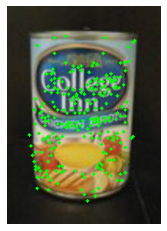

In [86]:
keypoints, gaussian_pyr = DoGdetector(im)
tmp_im = cv2.resize(im, (2*im.shape[1], 2*im.shape[0]))
for point in keypoints:
    cv2.circle(tmp_im, (2*point[0], 2*point[1]), 2, (0, 255, 0), -1)

cv2.imwrite('../results/keypoints.png', tmp_im)
plt.imshow(cv2.cvtColor(tmp_im, cv2.COLOR_BGR2RGB))
plt.axis("off")

In [64]:
i,j,k=16,39,0
neighbours = DoG_pyr[i-1:i+2,j-1:j+2,k]
up = DoG_pyr[i-1:i+2,j-1:j+2,k+1]
neighbours, up

(array([[ 0.03737666,  0.03579143,  0.03466816],
        [-0.03814062, -0.03937939, -0.03244272],
        [-0.03715789, -0.03780919, -0.02874011]], dtype=float32),
 array([[ 0.02626979,  0.02578545,  0.02649635],
        [-0.03437647, -0.03348762, -0.02805614],
        [-0.05447519, -0.05351305, -0.04756117]], dtype=float32))

SIFT in OpenCV